# T2 - Population clipping
This example shows up to calculate populations contained within a shapefile using a population raster (e.g., WorldPop)

In [1]:
from pathlib import Path
import rastertools
from rastertools import raster_clip
from rastertools.shape import plot_shapes
print(f"rastertools version v{rastertools.__version__}")

rastertools version v0.3.4


We need both a raster file with the population data along with the shapes.

In [2]:
# Using example DRC shapefile and raster
shape_file = Path('data/COD_LEV02_ZONES')
raster_file = Path('data/cod_2020_1km_aggregated_unadj.tif')

Now we clip. Note that we'll use one of the fieldnames (default: DOTNAME) that is contained in the shapefile to provide an index for the result.

In [3]:
# Clipping raster with shapes (only pop values)
popdict = raster_clip(raster_file, shape_file, include_latlon=True, shape_attr='DOTNAME', quiet=True)

Loading data...


Clipping:
1 of 519 (0%) AFRO:DRCONGO:BAS_UELE:AKETI (np.float64(23.755399318383496), np.float64(2.666893086229791)) {'lat': np.float64(2.666893086229791), 'lon': np.float64(23.755399318383496), 'pop': 111915}
519 of 519 (100%) AFRO:DRCONGO:TSHUAPA:YALIFAFO (np.float64(22.433076247922404), np.float64(-1.3598826795835743)) {'lat': np.float64(-1.3598826795835743), 'lon': np.float64(22.433076247922404), 'pop': 73333}


/workspaces/RasterTools/.venv/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


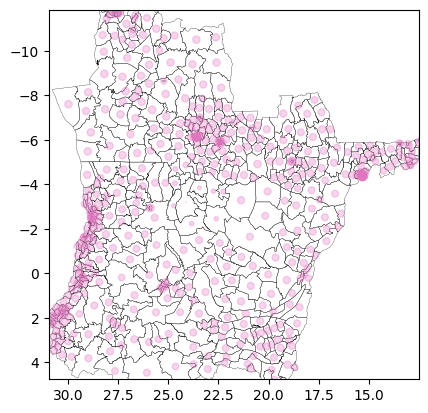

In [4]:
from math import log10
y = [e['lat'] for e in popdict.values()]
x = [e['lon'] for e in popdict.values()]
c = [5*log10(e['pop']+0.1) for e in popdict.values()]
fig, ax = plot_shapes(shape_file, linewidth=0.2, alpha=1.0, edgecolor='k', facecolor='None')
ax.scatter(x,y,s=c, alpha=0.3)
ax.set_box_aspect(1)